# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

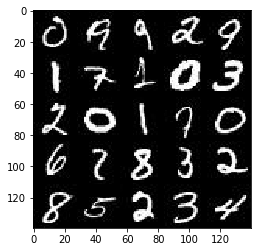

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

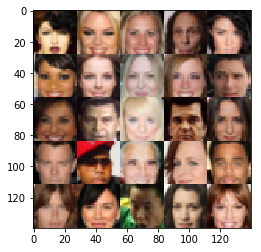

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'real_input')
    z_data = tf.placeholder(tf.float32, (None, z_dim), name = 'z_data')
    learning_rate = tf.placeholder(tf.float32)

    return (real_input, z_data, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    #Input 28x28x_
    with tf.variable_scope('discriminator', reuse = reuse):
        #Layer 1
        x1 = tf.layers.conv2d(images, 64, 5, strides = 2, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), padding = 'SAME')
        lrelu1 = tf.maximum(alpha * x1, x1)
        #14x14x64
        
        #Layer 2
        x2 = tf.layers.conv2d(lrelu1, 128, 5, strides = 2, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), padding = 'SAME')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        #7x7x128
        
        #Layer 3
        x3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, 
                              kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), padding='SAME')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        #4x4x256
        
        #Fully connected layer
        fc = tf.reshape(lrelu3, (-1, 4*4*256))
        logits = tf.layers.dense(fc, 1, kernel_initializer=tf.contrib.layers.xavier_initializer(uniform = False))
        out = tf.sigmoid(logits)

    return (out, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse = not is_train):
        # First fully connected layer
        fc = tf.layers.dense(z, 2*2*2048, kernel_initializer=tf.contrib.layers.xavier_initializer(uniform = False))
        #Reshape for deconvolutional stack
        x1 = tf.reshape(fc, (-1, 2, 2, 2048))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        #x1 = tf.nn.relu(x1)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        #2x2x1024
        
        x11 = tf.layers.conv2d_transpose(x1, 1024, 4, strides=2, 
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), 
                                        padding='SAME')
        x11 = tf.layers.batch_normalization(x11, training = is_train)
        x11 = tf.maximum(alpha * x11, x11)
        #print(x11.shape)
        #4x4x512
        
        #Layer 2
        x2 = tf.layers.conv2d_transpose(x11, 512, 4, strides=1, 
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), 
                                        padding='VALID')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        #x2 = tf.nn.relu(x2)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        #7x7x256

        #Layer 3
        x3 = tf.layers.conv2d_transpose(x2, 256, 5, strides=2, 
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), 
                                        padding='SAME')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        #x3 = tf.nn.relu(x3)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        #14x14x128
        
        #Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, 
                                            kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d(uniform = False), 
                                            padding='SAME')
        #28x28xout_channel_dim
        
        out = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    smooth = 0.1 #for one-sided label smoothing
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = g_vars)

    return (d_train_opt, g_train_opt)
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    if data_image_mode is 'RGB': number_channels = 3
    else: number_channels = 1
    
    #model_inputs(image_width, image_height, image_channels, z_dim):
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], number_channels, z_dim)
    #model_loss(input_real, input_z, out_channel_dim)
    d_loss, g_loss = model_loss(input_real, input_z, number_channels)
    
    #model_opt(d_loss, g_loss, learning_rate, beta1)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(72, z_dim))

    samples, losses = [], []
    steps = 0   
    print_every = 10
    show_every = 100
    n_images = 25

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                #Scale images from [-0.5, 0.5] to [-1, 1]
                batch_images = np.multiply(batch_images, 2)

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, number_channels, data_image_mode)



### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5823... Generator Loss: 1.5759
Epoch 1/2... Discriminator Loss: 0.3988... Generator Loss: 3.4346
Epoch 1/2... Discriminator Loss: 0.4600... Generator Loss: 2.3065
Epoch 1/2... Discriminator Loss: 0.5912... Generator Loss: 1.7501
Epoch 1/2... Discriminator Loss: 2.2119... Generator Loss: 11.8519
Epoch 1/2... Discriminator Loss: 0.4223... Generator Loss: 6.7266
Epoch 1/2... Discriminator Loss: 0.8369... Generator Loss: 1.0307
Epoch 1/2... Discriminator Loss: 0.6309... Generator Loss: 2.0138
Epoch 1/2... Discriminator Loss: 0.6526... Generator Loss: 1.7996
Epoch 1/2... Discriminator Loss: 0.6180... Generator Loss: 2.2971


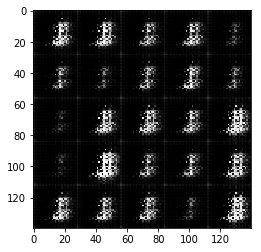

Epoch 1/2... Discriminator Loss: 2.0990... Generator Loss: 6.5221
Epoch 1/2... Discriminator Loss: 1.6794... Generator Loss: 3.5508
Epoch 1/2... Discriminator Loss: 0.4172... Generator Loss: 3.0681
Epoch 1/2... Discriminator Loss: 0.5006... Generator Loss: 2.8545
Epoch 1/2... Discriminator Loss: 0.5000... Generator Loss: 2.4785
Epoch 1/2... Discriminator Loss: 0.3953... Generator Loss: 3.9867
Epoch 1/2... Discriminator Loss: 0.3871... Generator Loss: 7.3491
Epoch 1/2... Discriminator Loss: 0.4819... Generator Loss: 4.0467
Epoch 1/2... Discriminator Loss: 0.3831... Generator Loss: 6.2587
Epoch 1/2... Discriminator Loss: 0.4161... Generator Loss: 3.4725


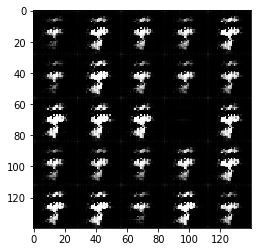

Epoch 1/2... Discriminator Loss: 0.4194... Generator Loss: 3.7528
Epoch 1/2... Discriminator Loss: 0.9947... Generator Loss: 8.7091
Epoch 1/2... Discriminator Loss: 0.4142... Generator Loss: 3.7008
Epoch 1/2... Discriminator Loss: 0.4493... Generator Loss: 4.0963
Epoch 1/2... Discriminator Loss: 0.4823... Generator Loss: 2.5337
Epoch 1/2... Discriminator Loss: 0.4820... Generator Loss: 3.1396
Epoch 1/2... Discriminator Loss: 0.7503... Generator Loss: 2.2238
Epoch 1/2... Discriminator Loss: 3.0661... Generator Loss: 0.1455
Epoch 1/2... Discriminator Loss: 1.0376... Generator Loss: 2.1210
Epoch 1/2... Discriminator Loss: 0.6413... Generator Loss: 2.1305


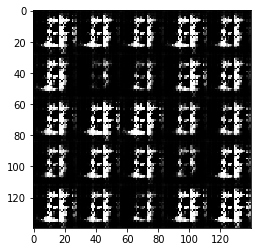

Epoch 1/2... Discriminator Loss: 0.5108... Generator Loss: 2.6914
Epoch 1/2... Discriminator Loss: 0.5240... Generator Loss: 2.4248
Epoch 1/2... Discriminator Loss: 0.5035... Generator Loss: 2.9577
Epoch 1/2... Discriminator Loss: 0.4522... Generator Loss: 2.6637
Epoch 1/2... Discriminator Loss: 0.4258... Generator Loss: 3.1143
Epoch 1/2... Discriminator Loss: 0.3959... Generator Loss: 4.5552
Epoch 1/2... Discriminator Loss: 0.5680... Generator Loss: 2.5895
Epoch 1/2... Discriminator Loss: 0.8517... Generator Loss: 1.2962
Epoch 1/2... Discriminator Loss: 0.7394... Generator Loss: 1.7132
Epoch 1/2... Discriminator Loss: 0.4867... Generator Loss: 2.9748


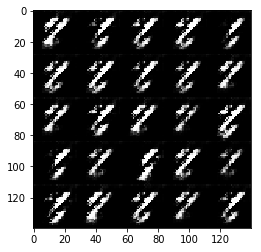

Epoch 1/2... Discriminator Loss: 0.4823... Generator Loss: 2.9208
Epoch 1/2... Discriminator Loss: 0.4368... Generator Loss: 3.3457
Epoch 1/2... Discriminator Loss: 0.4249... Generator Loss: 3.4455
Epoch 1/2... Discriminator Loss: 0.3865... Generator Loss: 3.3940
Epoch 1/2... Discriminator Loss: 0.4433... Generator Loss: 3.2607
Epoch 1/2... Discriminator Loss: 0.4323... Generator Loss: 3.1896
Epoch 1/2... Discriminator Loss: 0.4093... Generator Loss: 4.0286
Epoch 1/2... Discriminator Loss: 0.4060... Generator Loss: 3.7722
Epoch 1/2... Discriminator Loss: 0.4205... Generator Loss: 3.4352
Epoch 1/2... Discriminator Loss: 0.4511... Generator Loss: 2.8063


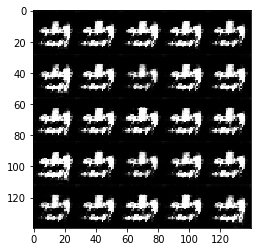

Epoch 1/2... Discriminator Loss: 0.3967... Generator Loss: 3.9299
Epoch 1/2... Discriminator Loss: 0.4796... Generator Loss: 3.7743
Epoch 1/2... Discriminator Loss: 0.6024... Generator Loss: 2.6074
Epoch 1/2... Discriminator Loss: 0.4698... Generator Loss: 3.3890
Epoch 1/2... Discriminator Loss: 0.4920... Generator Loss: 2.7613
Epoch 1/2... Discriminator Loss: 0.4507... Generator Loss: 3.3635
Epoch 1/2... Discriminator Loss: 0.5390... Generator Loss: 2.1922
Epoch 1/2... Discriminator Loss: 0.4640... Generator Loss: 4.3163
Epoch 1/2... Discriminator Loss: 0.4613... Generator Loss: 2.9211
Epoch 1/2... Discriminator Loss: 0.4441... Generator Loss: 3.6988


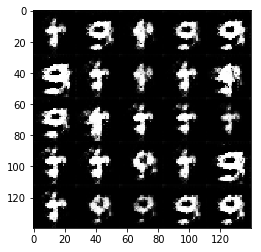

Epoch 1/2... Discriminator Loss: 0.4850... Generator Loss: 3.2787
Epoch 1/2... Discriminator Loss: 0.5169... Generator Loss: 2.5923
Epoch 1/2... Discriminator Loss: 0.5158... Generator Loss: 2.5131
Epoch 1/2... Discriminator Loss: 0.6950... Generator Loss: 3.5172
Epoch 1/2... Discriminator Loss: 0.5687... Generator Loss: 2.3717
Epoch 1/2... Discriminator Loss: 0.5610... Generator Loss: 2.3828
Epoch 1/2... Discriminator Loss: 0.5389... Generator Loss: 2.6979
Epoch 1/2... Discriminator Loss: 0.5186... Generator Loss: 3.1461
Epoch 1/2... Discriminator Loss: 0.5634... Generator Loss: 2.8865
Epoch 1/2... Discriminator Loss: 0.5047... Generator Loss: 3.0037


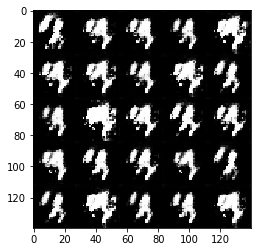

Epoch 1/2... Discriminator Loss: 0.4049... Generator Loss: 3.7653
Epoch 1/2... Discriminator Loss: 0.4666... Generator Loss: 3.2230
Epoch 1/2... Discriminator Loss: 0.4576... Generator Loss: 2.8214
Epoch 1/2... Discriminator Loss: 0.4405... Generator Loss: 5.5820
Epoch 1/2... Discriminator Loss: 0.5072... Generator Loss: 3.4338
Epoch 1/2... Discriminator Loss: 0.5141... Generator Loss: 2.7850
Epoch 1/2... Discriminator Loss: 0.4634... Generator Loss: 2.8019
Epoch 1/2... Discriminator Loss: 0.5145... Generator Loss: 2.6278
Epoch 1/2... Discriminator Loss: 0.5869... Generator Loss: 3.4492
Epoch 1/2... Discriminator Loss: 0.4986... Generator Loss: 3.4015


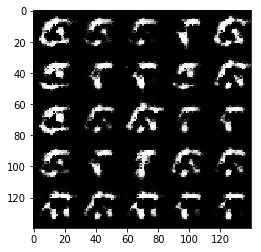

Epoch 1/2... Discriminator Loss: 0.5147... Generator Loss: 3.1175
Epoch 1/2... Discriminator Loss: 0.4428... Generator Loss: 3.1895
Epoch 1/2... Discriminator Loss: 0.4923... Generator Loss: 2.9538
Epoch 1/2... Discriminator Loss: 0.4582... Generator Loss: 2.7225
Epoch 1/2... Discriminator Loss: 0.4841... Generator Loss: 2.8449
Epoch 1/2... Discriminator Loss: 0.5443... Generator Loss: 2.0869
Epoch 1/2... Discriminator Loss: 0.6136... Generator Loss: 2.1206
Epoch 1/2... Discriminator Loss: 0.5839... Generator Loss: 2.7135
Epoch 1/2... Discriminator Loss: 0.7674... Generator Loss: 1.5441
Epoch 1/2... Discriminator Loss: 0.5559... Generator Loss: 3.3732


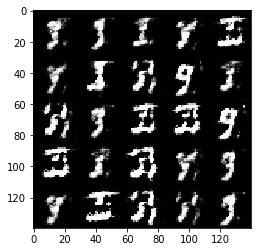

Epoch 1/2... Discriminator Loss: 0.4865... Generator Loss: 4.1530
Epoch 1/2... Discriminator Loss: 0.7707... Generator Loss: 1.4568
Epoch 1/2... Discriminator Loss: 0.5408... Generator Loss: 2.3925
Epoch 1/2... Discriminator Loss: 0.4863... Generator Loss: 2.5674
Epoch 1/2... Discriminator Loss: 0.5946... Generator Loss: 2.8557
Epoch 1/2... Discriminator Loss: 0.6480... Generator Loss: 2.9773
Epoch 1/2... Discriminator Loss: 0.5150... Generator Loss: 2.8095
Epoch 1/2... Discriminator Loss: 0.5848... Generator Loss: 2.3564
Epoch 1/2... Discriminator Loss: 0.8481... Generator Loss: 1.4081
Epoch 1/2... Discriminator Loss: 0.9387... Generator Loss: 5.7408


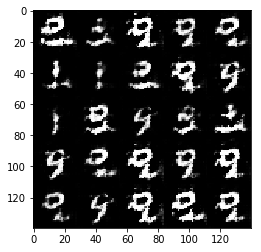

Epoch 1/2... Discriminator Loss: 0.5929... Generator Loss: 2.9627
Epoch 1/2... Discriminator Loss: 0.5561... Generator Loss: 2.2991
Epoch 1/2... Discriminator Loss: 0.5093... Generator Loss: 2.5159
Epoch 1/2... Discriminator Loss: 0.6415... Generator Loss: 1.9532
Epoch 1/2... Discriminator Loss: 0.8696... Generator Loss: 3.6406
Epoch 1/2... Discriminator Loss: 0.6115... Generator Loss: 2.7334
Epoch 1/2... Discriminator Loss: 0.6558... Generator Loss: 2.3844
Epoch 1/2... Discriminator Loss: 0.8701... Generator Loss: 1.2479
Epoch 1/2... Discriminator Loss: 0.9375... Generator Loss: 3.4107
Epoch 1/2... Discriminator Loss: 0.6479... Generator Loss: 1.8160


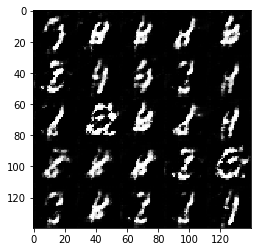

Epoch 1/2... Discriminator Loss: 0.5177... Generator Loss: 3.2219
Epoch 1/2... Discriminator Loss: 0.9043... Generator Loss: 1.4647
Epoch 1/2... Discriminator Loss: 0.7093... Generator Loss: 2.0178
Epoch 1/2... Discriminator Loss: 0.7192... Generator Loss: 2.8262
Epoch 1/2... Discriminator Loss: 0.7781... Generator Loss: 1.5353
Epoch 1/2... Discriminator Loss: 0.8480... Generator Loss: 2.1975
Epoch 1/2... Discriminator Loss: 0.6044... Generator Loss: 2.6563
Epoch 1/2... Discriminator Loss: 0.7550... Generator Loss: 1.5567
Epoch 1/2... Discriminator Loss: 0.8784... Generator Loss: 1.1848
Epoch 1/2... Discriminator Loss: 0.6101... Generator Loss: 2.9395


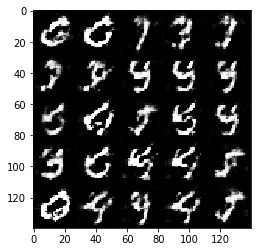

Epoch 1/2... Discriminator Loss: 0.6745... Generator Loss: 1.8831
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 0.9901
Epoch 1/2... Discriminator Loss: 0.7865... Generator Loss: 1.2671
Epoch 1/2... Discriminator Loss: 0.7491... Generator Loss: 2.0124
Epoch 1/2... Discriminator Loss: 0.8637... Generator Loss: 1.1705
Epoch 1/2... Discriminator Loss: 0.8182... Generator Loss: 1.4067
Epoch 1/2... Discriminator Loss: 0.9799... Generator Loss: 1.0052
Epoch 1/2... Discriminator Loss: 0.9788... Generator Loss: 1.0990
Epoch 1/2... Discriminator Loss: 0.8147... Generator Loss: 1.4921
Epoch 1/2... Discriminator Loss: 0.7721... Generator Loss: 1.2802


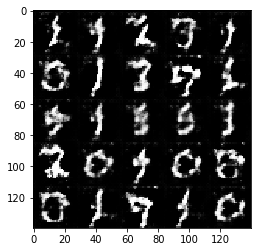

Epoch 1/2... Discriminator Loss: 0.7926... Generator Loss: 2.3851
Epoch 1/2... Discriminator Loss: 0.6566... Generator Loss: 1.7275
Epoch 1/2... Discriminator Loss: 0.6771... Generator Loss: 2.2520
Epoch 1/2... Discriminator Loss: 0.9045... Generator Loss: 2.1627
Epoch 1/2... Discriminator Loss: 0.9956... Generator Loss: 0.9193
Epoch 1/2... Discriminator Loss: 1.0048... Generator Loss: 2.8079
Epoch 1/2... Discriminator Loss: 0.8817... Generator Loss: 1.2149
Epoch 1/2... Discriminator Loss: 0.8310... Generator Loss: 1.4616
Epoch 1/2... Discriminator Loss: 0.8165... Generator Loss: 1.3671
Epoch 1/2... Discriminator Loss: 0.7613... Generator Loss: 1.7102


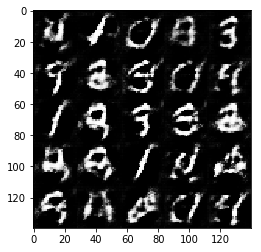

Epoch 1/2... Discriminator Loss: 0.8652... Generator Loss: 1.3402
Epoch 1/2... Discriminator Loss: 0.7926... Generator Loss: 1.5530
Epoch 1/2... Discriminator Loss: 0.6543... Generator Loss: 1.6914
Epoch 1/2... Discriminator Loss: 1.0357... Generator Loss: 1.9373
Epoch 1/2... Discriminator Loss: 0.8029... Generator Loss: 1.6135
Epoch 1/2... Discriminator Loss: 0.7958... Generator Loss: 1.9368
Epoch 1/2... Discriminator Loss: 0.8215... Generator Loss: 1.3726
Epoch 1/2... Discriminator Loss: 0.9501... Generator Loss: 1.0988
Epoch 1/2... Discriminator Loss: 0.6657... Generator Loss: 2.0162
Epoch 1/2... Discriminator Loss: 0.6949... Generator Loss: 1.6329


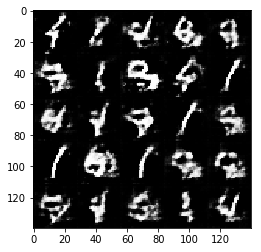

Epoch 1/2... Discriminator Loss: 0.7106... Generator Loss: 1.4647
Epoch 1/2... Discriminator Loss: 0.8868... Generator Loss: 1.1453
Epoch 1/2... Discriminator Loss: 1.0583... Generator Loss: 1.0256
Epoch 1/2... Discriminator Loss: 0.9131... Generator Loss: 1.2780
Epoch 1/2... Discriminator Loss: 0.9155... Generator Loss: 1.2928
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 1.8944
Epoch 1/2... Discriminator Loss: 0.9079... Generator Loss: 2.3891
Epoch 1/2... Discriminator Loss: 0.8207... Generator Loss: 1.7290
Epoch 1/2... Discriminator Loss: 0.7685... Generator Loss: 1.4530
Epoch 1/2... Discriminator Loss: 0.9428... Generator Loss: 1.1791


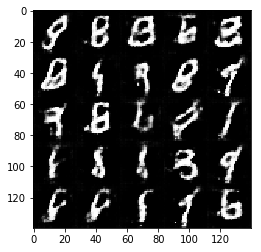

Epoch 1/2... Discriminator Loss: 0.7656... Generator Loss: 1.6840
Epoch 1/2... Discriminator Loss: 1.2595... Generator Loss: 0.7730
Epoch 1/2... Discriminator Loss: 1.0125... Generator Loss: 1.6225
Epoch 1/2... Discriminator Loss: 1.2312... Generator Loss: 0.7991
Epoch 1/2... Discriminator Loss: 0.9583... Generator Loss: 1.5114
Epoch 1/2... Discriminator Loss: 0.9321... Generator Loss: 1.2211
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 2.3804
Epoch 1/2... Discriminator Loss: 0.9480... Generator Loss: 1.3074
Epoch 1/2... Discriminator Loss: 0.8812... Generator Loss: 1.5270
Epoch 1/2... Discriminator Loss: 1.0397... Generator Loss: 1.6146


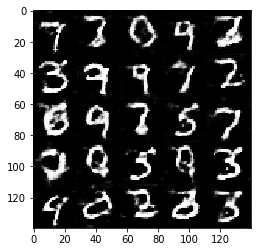

Epoch 1/2... Discriminator Loss: 1.1196... Generator Loss: 1.4787
Epoch 1/2... Discriminator Loss: 0.8540... Generator Loss: 1.4185
Epoch 1/2... Discriminator Loss: 1.2766... Generator Loss: 0.7511
Epoch 1/2... Discriminator Loss: 0.8045... Generator Loss: 2.0935
Epoch 1/2... Discriminator Loss: 0.9861... Generator Loss: 1.0430
Epoch 1/2... Discriminator Loss: 0.8998... Generator Loss: 1.1201
Epoch 1/2... Discriminator Loss: 1.0685... Generator Loss: 1.0236
Epoch 1/2... Discriminator Loss: 0.9845... Generator Loss: 1.2673
Epoch 1/2... Discriminator Loss: 1.0657... Generator Loss: 1.8593
Epoch 1/2... Discriminator Loss: 1.0374... Generator Loss: 0.9537


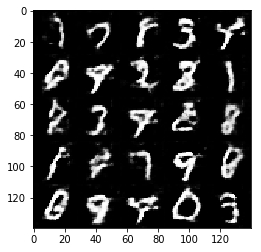

Epoch 1/2... Discriminator Loss: 1.0852... Generator Loss: 1.0327
Epoch 1/2... Discriminator Loss: 1.2135... Generator Loss: 1.3583
Epoch 1/2... Discriminator Loss: 1.0788... Generator Loss: 1.1261
Epoch 1/2... Discriminator Loss: 1.0124... Generator Loss: 0.9507
Epoch 1/2... Discriminator Loss: 1.1853... Generator Loss: 0.7561
Epoch 1/2... Discriminator Loss: 1.2578... Generator Loss: 1.6460
Epoch 1/2... Discriminator Loss: 1.0936... Generator Loss: 1.5252
Epoch 2/2... Discriminator Loss: 1.0134... Generator Loss: 1.6233
Epoch 2/2... Discriminator Loss: 1.2834... Generator Loss: 0.6632
Epoch 2/2... Discriminator Loss: 0.9196... Generator Loss: 1.1125


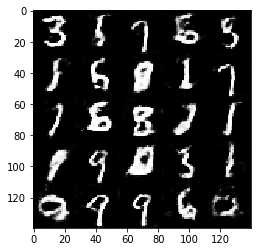

Epoch 2/2... Discriminator Loss: 1.2951... Generator Loss: 0.6262
Epoch 2/2... Discriminator Loss: 1.0070... Generator Loss: 1.3649
Epoch 2/2... Discriminator Loss: 1.1672... Generator Loss: 0.9739
Epoch 2/2... Discriminator Loss: 0.9566... Generator Loss: 1.2193
Epoch 2/2... Discriminator Loss: 0.9372... Generator Loss: 0.9830
Epoch 2/2... Discriminator Loss: 1.0189... Generator Loss: 1.0532
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 1.1511
Epoch 2/2... Discriminator Loss: 0.9808... Generator Loss: 1.2433
Epoch 2/2... Discriminator Loss: 0.9015... Generator Loss: 1.2935
Epoch 2/2... Discriminator Loss: 0.8443... Generator Loss: 1.3119


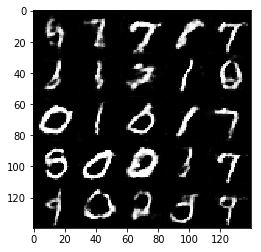

Epoch 2/2... Discriminator Loss: 1.0927... Generator Loss: 0.8167
Epoch 2/2... Discriminator Loss: 0.8256... Generator Loss: 1.5651
Epoch 2/2... Discriminator Loss: 1.1100... Generator Loss: 1.3227
Epoch 2/2... Discriminator Loss: 0.9052... Generator Loss: 1.0949
Epoch 2/2... Discriminator Loss: 0.9541... Generator Loss: 1.1696
Epoch 2/2... Discriminator Loss: 1.0867... Generator Loss: 0.8176
Epoch 2/2... Discriminator Loss: 1.0595... Generator Loss: 1.2624
Epoch 2/2... Discriminator Loss: 1.1685... Generator Loss: 0.8083
Epoch 2/2... Discriminator Loss: 0.8909... Generator Loss: 1.5255
Epoch 2/2... Discriminator Loss: 1.0747... Generator Loss: 1.1388


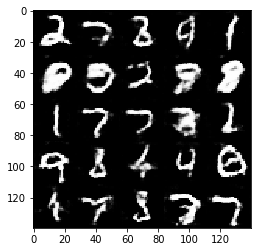

Epoch 2/2... Discriminator Loss: 0.8735... Generator Loss: 1.2724
Epoch 2/2... Discriminator Loss: 1.2541... Generator Loss: 2.1850
Epoch 2/2... Discriminator Loss: 1.0272... Generator Loss: 0.9017
Epoch 2/2... Discriminator Loss: 1.0723... Generator Loss: 1.2848
Epoch 2/2... Discriminator Loss: 0.9308... Generator Loss: 1.1125
Epoch 2/2... Discriminator Loss: 1.0341... Generator Loss: 1.0589
Epoch 2/2... Discriminator Loss: 0.9904... Generator Loss: 1.5677
Epoch 2/2... Discriminator Loss: 1.1925... Generator Loss: 0.6829
Epoch 2/2... Discriminator Loss: 1.0414... Generator Loss: 0.9820
Epoch 2/2... Discriminator Loss: 1.2376... Generator Loss: 0.7822


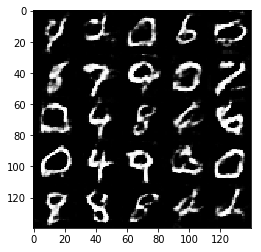

Epoch 2/2... Discriminator Loss: 0.9835... Generator Loss: 1.1992
Epoch 2/2... Discriminator Loss: 0.9520... Generator Loss: 1.8015
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 0.8146
Epoch 2/2... Discriminator Loss: 1.1178... Generator Loss: 1.7356
Epoch 2/2... Discriminator Loss: 0.8600... Generator Loss: 1.2773
Epoch 2/2... Discriminator Loss: 1.0929... Generator Loss: 0.7738
Epoch 2/2... Discriminator Loss: 0.9597... Generator Loss: 1.0742
Epoch 2/2... Discriminator Loss: 0.8875... Generator Loss: 1.5969
Epoch 2/2... Discriminator Loss: 1.0755... Generator Loss: 0.9208
Epoch 2/2... Discriminator Loss: 1.0875... Generator Loss: 0.8391


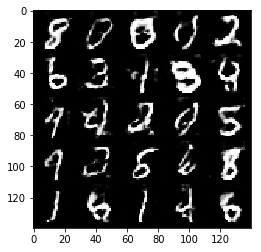

Epoch 2/2... Discriminator Loss: 0.9684... Generator Loss: 1.1928
Epoch 2/2... Discriminator Loss: 1.1673... Generator Loss: 0.7591
Epoch 2/2... Discriminator Loss: 1.1258... Generator Loss: 0.9294
Epoch 2/2... Discriminator Loss: 1.1134... Generator Loss: 0.7217
Epoch 2/2... Discriminator Loss: 1.1767... Generator Loss: 0.7113
Epoch 2/2... Discriminator Loss: 1.1330... Generator Loss: 0.7880
Epoch 2/2... Discriminator Loss: 1.2646... Generator Loss: 0.6039
Epoch 2/2... Discriminator Loss: 1.2933... Generator Loss: 0.6294
Epoch 2/2... Discriminator Loss: 0.9631... Generator Loss: 1.1625
Epoch 2/2... Discriminator Loss: 1.0227... Generator Loss: 1.0243


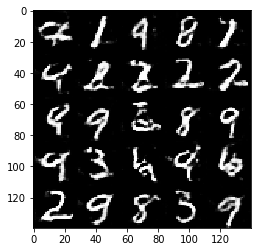

Epoch 2/2... Discriminator Loss: 1.0630... Generator Loss: 1.1496
Epoch 2/2... Discriminator Loss: 0.9776... Generator Loss: 1.0657
Epoch 2/2... Discriminator Loss: 0.8664... Generator Loss: 1.2957
Epoch 2/2... Discriminator Loss: 0.9384... Generator Loss: 1.6918
Epoch 2/2... Discriminator Loss: 0.8938... Generator Loss: 1.4336
Epoch 2/2... Discriminator Loss: 1.0008... Generator Loss: 1.4290
Epoch 2/2... Discriminator Loss: 0.9147... Generator Loss: 1.2774
Epoch 2/2... Discriminator Loss: 1.4701... Generator Loss: 0.4985
Epoch 2/2... Discriminator Loss: 0.8830... Generator Loss: 1.1107
Epoch 2/2... Discriminator Loss: 1.4642... Generator Loss: 0.5142


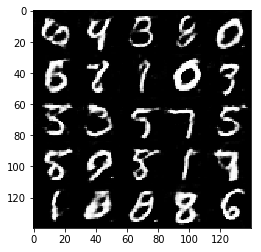

Epoch 2/2... Discriminator Loss: 1.6064... Generator Loss: 0.4047
Epoch 2/2... Discriminator Loss: 1.0196... Generator Loss: 1.1308
Epoch 2/2... Discriminator Loss: 0.9634... Generator Loss: 1.0083
Epoch 2/2... Discriminator Loss: 1.0552... Generator Loss: 0.8669
Epoch 2/2... Discriminator Loss: 1.0605... Generator Loss: 1.1518
Epoch 2/2... Discriminator Loss: 1.4632... Generator Loss: 0.4804
Epoch 2/2... Discriminator Loss: 1.0182... Generator Loss: 0.9169
Epoch 2/2... Discriminator Loss: 0.8325... Generator Loss: 1.7514
Epoch 2/2... Discriminator Loss: 1.5433... Generator Loss: 0.4153
Epoch 2/2... Discriminator Loss: 1.1788... Generator Loss: 0.8939


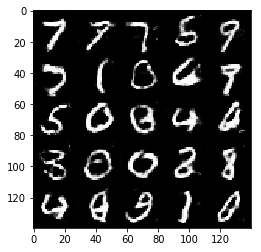

Epoch 2/2... Discriminator Loss: 1.1781... Generator Loss: 1.5661
Epoch 2/2... Discriminator Loss: 0.9534... Generator Loss: 1.6274
Epoch 2/2... Discriminator Loss: 0.9818... Generator Loss: 1.0791
Epoch 2/2... Discriminator Loss: 1.2620... Generator Loss: 1.2775
Epoch 2/2... Discriminator Loss: 0.9802... Generator Loss: 1.0954
Epoch 2/2... Discriminator Loss: 1.3712... Generator Loss: 0.5111
Epoch 2/2... Discriminator Loss: 0.8528... Generator Loss: 1.2214
Epoch 2/2... Discriminator Loss: 1.8657... Generator Loss: 0.3041
Epoch 2/2... Discriminator Loss: 1.1993... Generator Loss: 0.7146
Epoch 2/2... Discriminator Loss: 1.0232... Generator Loss: 0.8956


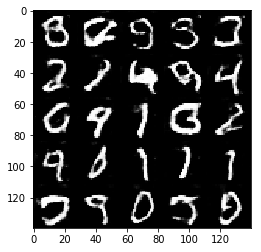

Epoch 2/2... Discriminator Loss: 1.5133... Generator Loss: 0.5056
Epoch 2/2... Discriminator Loss: 1.0539... Generator Loss: 1.9653
Epoch 2/2... Discriminator Loss: 0.9938... Generator Loss: 1.1666
Epoch 2/2... Discriminator Loss: 1.8205... Generator Loss: 0.3272
Epoch 2/2... Discriminator Loss: 1.0889... Generator Loss: 0.8211
Epoch 2/2... Discriminator Loss: 0.9593... Generator Loss: 1.0875
Epoch 2/2... Discriminator Loss: 1.0580... Generator Loss: 2.1027
Epoch 2/2... Discriminator Loss: 1.1564... Generator Loss: 1.7605
Epoch 2/2... Discriminator Loss: 0.9738... Generator Loss: 1.6598
Epoch 2/2... Discriminator Loss: 0.9457... Generator Loss: 1.0841


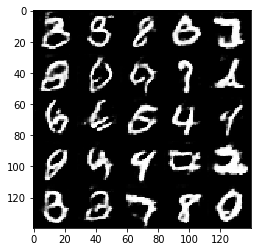

Epoch 2/2... Discriminator Loss: 1.1632... Generator Loss: 0.7491
Epoch 2/2... Discriminator Loss: 0.8954... Generator Loss: 1.3008
Epoch 2/2... Discriminator Loss: 0.8015... Generator Loss: 1.2790
Epoch 2/2... Discriminator Loss: 1.0603... Generator Loss: 1.5423
Epoch 2/2... Discriminator Loss: 1.0210... Generator Loss: 1.5564
Epoch 2/2... Discriminator Loss: 0.8401... Generator Loss: 1.2055
Epoch 2/2... Discriminator Loss: 1.0123... Generator Loss: 1.1583
Epoch 2/2... Discriminator Loss: 0.9524... Generator Loss: 1.2597
Epoch 2/2... Discriminator Loss: 1.0561... Generator Loss: 0.8618
Epoch 2/2... Discriminator Loss: 0.9169... Generator Loss: 0.9896


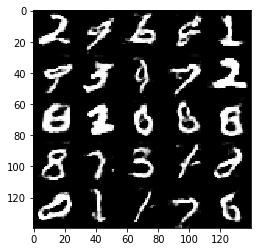

Epoch 2/2... Discriminator Loss: 1.0649... Generator Loss: 0.7979
Epoch 2/2... Discriminator Loss: 0.9819... Generator Loss: 0.9551
Epoch 2/2... Discriminator Loss: 1.0889... Generator Loss: 0.9174
Epoch 2/2... Discriminator Loss: 1.7922... Generator Loss: 0.3202
Epoch 2/2... Discriminator Loss: 1.0970... Generator Loss: 0.7419
Epoch 2/2... Discriminator Loss: 1.1648... Generator Loss: 1.9687
Epoch 2/2... Discriminator Loss: 1.0390... Generator Loss: 0.9209
Epoch 2/2... Discriminator Loss: 1.0314... Generator Loss: 0.8185
Epoch 2/2... Discriminator Loss: 0.8727... Generator Loss: 2.0484
Epoch 2/2... Discriminator Loss: 1.7277... Generator Loss: 0.3457


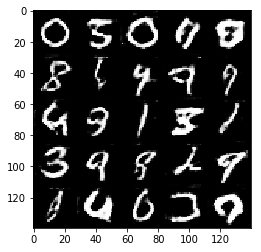

Epoch 2/2... Discriminator Loss: 1.0995... Generator Loss: 0.8161
Epoch 2/2... Discriminator Loss: 1.1610... Generator Loss: 0.7478
Epoch 2/2... Discriminator Loss: 0.9569... Generator Loss: 0.9610
Epoch 2/2... Discriminator Loss: 1.0430... Generator Loss: 0.8001
Epoch 2/2... Discriminator Loss: 1.0082... Generator Loss: 1.3389
Epoch 2/2... Discriminator Loss: 0.8755... Generator Loss: 1.5227
Epoch 2/2... Discriminator Loss: 1.1005... Generator Loss: 0.7678
Epoch 2/2... Discriminator Loss: 1.1323... Generator Loss: 0.7358
Epoch 2/2... Discriminator Loss: 1.4939... Generator Loss: 0.4678
Epoch 2/2... Discriminator Loss: 0.8830... Generator Loss: 1.9224


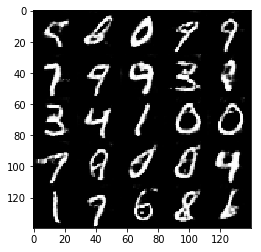

Epoch 2/2... Discriminator Loss: 0.8369... Generator Loss: 1.1728
Epoch 2/2... Discriminator Loss: 1.0135... Generator Loss: 0.8282
Epoch 2/2... Discriminator Loss: 0.9393... Generator Loss: 1.1880
Epoch 2/2... Discriminator Loss: 1.3823... Generator Loss: 1.9981
Epoch 2/2... Discriminator Loss: 0.8867... Generator Loss: 1.0957
Epoch 2/2... Discriminator Loss: 0.9376... Generator Loss: 1.1079
Epoch 2/2... Discriminator Loss: 0.8463... Generator Loss: 1.2664
Epoch 2/2... Discriminator Loss: 1.0572... Generator Loss: 1.3674
Epoch 2/2... Discriminator Loss: 0.9643... Generator Loss: 0.9449
Epoch 2/2... Discriminator Loss: 0.6977... Generator Loss: 1.6208


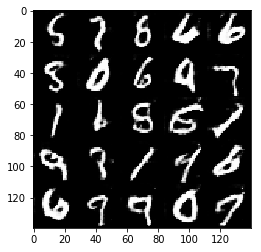

Epoch 2/2... Discriminator Loss: 0.9862... Generator Loss: 0.9909
Epoch 2/2... Discriminator Loss: 0.8786... Generator Loss: 1.0851
Epoch 2/2... Discriminator Loss: 1.3760... Generator Loss: 0.6084
Epoch 2/2... Discriminator Loss: 1.0647... Generator Loss: 0.8265
Epoch 2/2... Discriminator Loss: 1.1774... Generator Loss: 0.6768
Epoch 2/2... Discriminator Loss: 0.9227... Generator Loss: 1.0106
Epoch 2/2... Discriminator Loss: 0.9194... Generator Loss: 1.0155
Epoch 2/2... Discriminator Loss: 0.7161... Generator Loss: 1.5614
Epoch 2/2... Discriminator Loss: 1.1571... Generator Loss: 0.7071
Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 0.8671


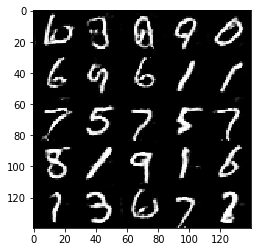

Epoch 2/2... Discriminator Loss: 0.7304... Generator Loss: 1.6960
Epoch 2/2... Discriminator Loss: 0.8706... Generator Loss: 1.2187
Epoch 2/2... Discriminator Loss: 1.4046... Generator Loss: 0.5325
Epoch 2/2... Discriminator Loss: 1.2206... Generator Loss: 0.6779
Epoch 2/2... Discriminator Loss: 0.9672... Generator Loss: 0.9851
Epoch 2/2... Discriminator Loss: 0.8081... Generator Loss: 1.3313
Epoch 2/2... Discriminator Loss: 0.7210... Generator Loss: 2.0254
Epoch 2/2... Discriminator Loss: 1.1681... Generator Loss: 2.5213
Epoch 2/2... Discriminator Loss: 0.9944... Generator Loss: 0.8490
Epoch 2/2... Discriminator Loss: 0.8610... Generator Loss: 1.4849


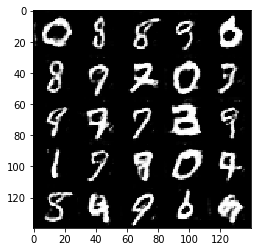

Epoch 2/2... Discriminator Loss: 0.8445... Generator Loss: 1.0786
Epoch 2/2... Discriminator Loss: 0.8393... Generator Loss: 1.1494
Epoch 2/2... Discriminator Loss: 0.8761... Generator Loss: 1.1952
Epoch 2/2... Discriminator Loss: 0.7988... Generator Loss: 1.4470
Epoch 2/2... Discriminator Loss: 0.9391... Generator Loss: 1.3412
Epoch 2/2... Discriminator Loss: 1.0220... Generator Loss: 0.8944
Epoch 2/2... Discriminator Loss: 0.8758... Generator Loss: 1.6634
Epoch 2/2... Discriminator Loss: 0.8721... Generator Loss: 1.6140
Epoch 2/2... Discriminator Loss: 0.8120... Generator Loss: 1.3557
Epoch 2/2... Discriminator Loss: 0.8148... Generator Loss: 1.4132


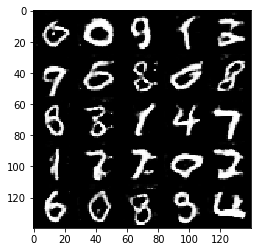

Epoch 2/2... Discriminator Loss: 0.7691... Generator Loss: 1.2952
Epoch 2/2... Discriminator Loss: 0.9466... Generator Loss: 1.0596
Epoch 2/2... Discriminator Loss: 0.7888... Generator Loss: 1.3543
Epoch 2/2... Discriminator Loss: 1.4646... Generator Loss: 0.5075
Epoch 2/2... Discriminator Loss: 0.9636... Generator Loss: 0.9360
Epoch 2/2... Discriminator Loss: 0.7629... Generator Loss: 1.3779
Epoch 2/2... Discriminator Loss: 1.2463... Generator Loss: 1.7165
Epoch 2/2... Discriminator Loss: 0.9522... Generator Loss: 1.0445
Epoch 2/2... Discriminator Loss: 1.2724... Generator Loss: 2.1060
Epoch 2/2... Discriminator Loss: 1.4616... Generator Loss: 0.5101


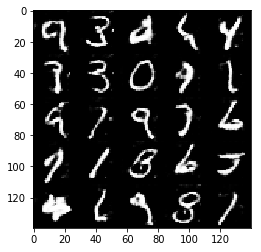

Epoch 2/2... Discriminator Loss: 0.6513... Generator Loss: 1.7487
Epoch 2/2... Discriminator Loss: 0.8942... Generator Loss: 1.5872
Epoch 2/2... Discriminator Loss: 0.8219... Generator Loss: 1.2716
Epoch 2/2... Discriminator Loss: 1.0802... Generator Loss: 0.7375
Epoch 2/2... Discriminator Loss: 0.8490... Generator Loss: 1.1482
Epoch 2/2... Discriminator Loss: 1.0348... Generator Loss: 0.8149
Epoch 2/2... Discriminator Loss: 0.7137... Generator Loss: 1.4129
Epoch 2/2... Discriminator Loss: 1.5145... Generator Loss: 0.4725
Epoch 2/2... Discriminator Loss: 1.0237... Generator Loss: 0.8993
Epoch 2/2... Discriminator Loss: 1.4549... Generator Loss: 0.5008


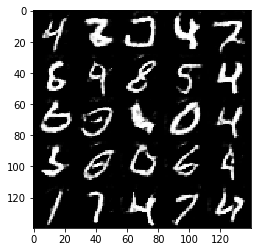

Epoch 2/2... Discriminator Loss: 0.9137... Generator Loss: 1.5290
Epoch 2/2... Discriminator Loss: 2.0359... Generator Loss: 3.7567
Epoch 2/2... Discriminator Loss: 0.9254... Generator Loss: 1.0364
Epoch 2/2... Discriminator Loss: 0.8924... Generator Loss: 2.5045
Epoch 2/2... Discriminator Loss: 0.8041... Generator Loss: 2.3192


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9203... Generator Loss: 1.0389
Epoch 1/1... Discriminator Loss: 0.6375... Generator Loss: 2.0607
Epoch 1/1... Discriminator Loss: 0.6232... Generator Loss: 3.4514
Epoch 1/1... Discriminator Loss: 0.5427... Generator Loss: 2.3389
Epoch 1/1... Discriminator Loss: 0.6082... Generator Loss: 2.2224
Epoch 1/1... Discriminator Loss: 0.6598... Generator Loss: 4.2272
Epoch 1/1... Discriminator Loss: 0.5496... Generator Loss: 6.3170
Epoch 1/1... Discriminator Loss: 0.6929... Generator Loss: 2.3770
Epoch 1/1... Discriminator Loss: 0.6134... Generator Loss: 2.2687
Epoch 1/1... Discriminator Loss: 0.5559... Generator Loss: 3.6453


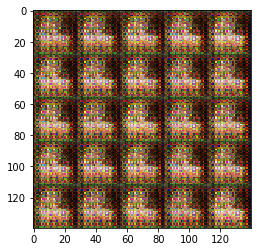

Epoch 1/1... Discriminator Loss: 0.4665... Generator Loss: 3.4266
Epoch 1/1... Discriminator Loss: 0.5514... Generator Loss: 2.6043
Epoch 1/1... Discriminator Loss: 0.4914... Generator Loss: 2.8956
Epoch 1/1... Discriminator Loss: 0.5398... Generator Loss: 4.3563
Epoch 1/1... Discriminator Loss: 0.7016... Generator Loss: 1.8854
Epoch 1/1... Discriminator Loss: 0.6660... Generator Loss: 1.4831
Epoch 1/1... Discriminator Loss: 0.4942... Generator Loss: 5.2204
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 5.0255
Epoch 1/1... Discriminator Loss: 0.9337... Generator Loss: 1.1653
Epoch 1/1... Discriminator Loss: 0.5942... Generator Loss: 3.1229


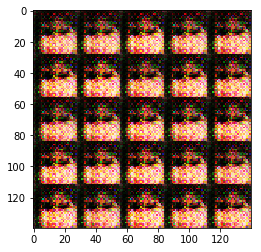

Epoch 1/1... Discriminator Loss: 0.5669... Generator Loss: 2.0865
Epoch 1/1... Discriminator Loss: 0.5651... Generator Loss: 2.1551
Epoch 1/1... Discriminator Loss: 0.4851... Generator Loss: 2.9609
Epoch 1/1... Discriminator Loss: 0.5437... Generator Loss: 2.0895
Epoch 1/1... Discriminator Loss: 0.6028... Generator Loss: 2.0758
Epoch 1/1... Discriminator Loss: 1.0377... Generator Loss: 1.9605
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 2.4691
Epoch 1/1... Discriminator Loss: 1.2051... Generator Loss: 1.5235
Epoch 1/1... Discriminator Loss: 1.1017... Generator Loss: 1.7372
Epoch 1/1... Discriminator Loss: 1.2665... Generator Loss: 0.6495


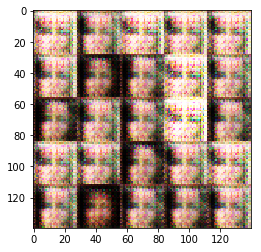

Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 1.1186
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 0.9892
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 1.1681
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 2.0324
Epoch 1/1... Discriminator Loss: 1.5550... Generator Loss: 0.8879
Epoch 1/1... Discriminator Loss: 1.1483... Generator Loss: 1.1525
Epoch 1/1... Discriminator Loss: 1.3852... Generator Loss: 0.8551
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.7522
Epoch 1/1... Discriminator Loss: 1.0790... Generator Loss: 1.1058


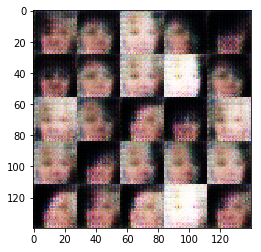

Epoch 1/1... Discriminator Loss: 1.5341... Generator Loss: 0.9044
Epoch 1/1... Discriminator Loss: 1.7822... Generator Loss: 0.7182
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 1.6053... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.3917... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.4642... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 0.8281
Epoch 1/1... Discriminator Loss: 1.9077... Generator Loss: 0.5115
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.9517
Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.8795


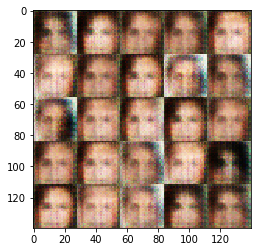

Epoch 1/1... Discriminator Loss: 1.5140... Generator Loss: 0.7529
Epoch 1/1... Discriminator Loss: 1.2398... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.2248... Generator Loss: 0.8982
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.7057
Epoch 1/1... Discriminator Loss: 1.2178... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.8244
Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.9391
Epoch 1/1... Discriminator Loss: 1.1194... Generator Loss: 1.1454
Epoch 1/1... Discriminator Loss: 1.4523... Generator Loss: 0.6877
Epoch 1/1... Discriminator Loss: 1.1432... Generator Loss: 1.0376


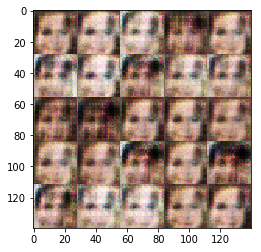

Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.9360
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 1.0374
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 0.9641
Epoch 1/1... Discriminator Loss: 1.7502... Generator Loss: 0.6433
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.8916
Epoch 1/1... Discriminator Loss: 1.1441... Generator Loss: 1.0662
Epoch 1/1... Discriminator Loss: 1.6557... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 1.0660
Epoch 1/1... Discriminator Loss: 1.0886... Generator Loss: 1.1280


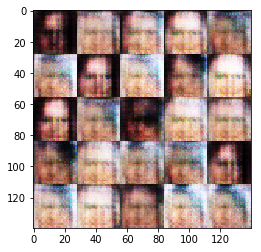

Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 0.9601
Epoch 1/1... Discriminator Loss: 1.5243... Generator Loss: 0.6168
Epoch 1/1... Discriminator Loss: 1.4494... Generator Loss: 0.8197
Epoch 1/1... Discriminator Loss: 1.1728... Generator Loss: 1.0477
Epoch 1/1... Discriminator Loss: 1.5503... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.2236... Generator Loss: 1.0031
Epoch 1/1... Discriminator Loss: 1.2378... Generator Loss: 0.9378
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.8937
Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.8776
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.8837


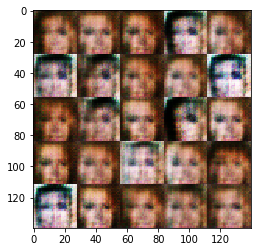

Epoch 1/1... Discriminator Loss: 1.2288... Generator Loss: 0.8132
Epoch 1/1... Discriminator Loss: 1.1352... Generator Loss: 1.1018
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.9855
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.9632
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 1.1066
Epoch 1/1... Discriminator Loss: 1.2448... Generator Loss: 0.8783
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 1.2412
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.6817
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 0.9953
Epoch 1/1... Discriminator Loss: 1.7722... Generator Loss: 0.7378


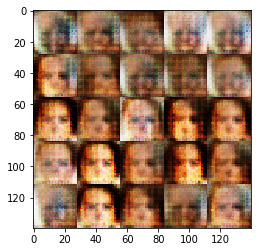

Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.9223
Epoch 1/1... Discriminator Loss: 1.4116... Generator Loss: 0.8628
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.9887
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.8810
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 1.2433
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.9393
Epoch 1/1... Discriminator Loss: 1.5635... Generator Loss: 0.7957
Epoch 1/1... Discriminator Loss: 1.1732... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 1.1835... Generator Loss: 1.0863


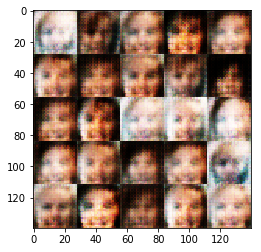

Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 1.0345
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.8524
Epoch 1/1... Discriminator Loss: 1.5478... Generator Loss: 0.5607
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.9347
Epoch 1/1... Discriminator Loss: 1.7824... Generator Loss: 0.3720
Epoch 1/1... Discriminator Loss: 0.9330... Generator Loss: 1.1558
Epoch 1/1... Discriminator Loss: 1.4130... Generator Loss: 0.9724
Epoch 1/1... Discriminator Loss: 1.3749... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.0997... Generator Loss: 1.7037


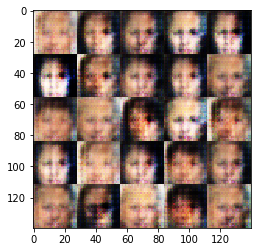

Epoch 1/1... Discriminator Loss: 2.2699... Generator Loss: 0.1881
Epoch 1/1... Discriminator Loss: 1.6865... Generator Loss: 0.8840
Epoch 1/1... Discriminator Loss: 1.1828... Generator Loss: 1.1975
Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 1.1112
Epoch 1/1... Discriminator Loss: 1.2227... Generator Loss: 2.0483
Epoch 1/1... Discriminator Loss: 2.1086... Generator Loss: 0.2317
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 1.5977
Epoch 1/1... Discriminator Loss: 1.0961... Generator Loss: 1.1102
Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.5894
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 1.4153


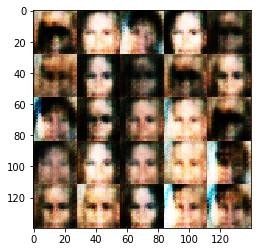

Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 1.6785
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 1.0983
Epoch 1/1... Discriminator Loss: 1.5156... Generator Loss: 0.4468
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 3.1136
Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 2.0773
Epoch 1/1... Discriminator Loss: 1.4434... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 1.5541
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 1.5551
Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 1.1859
Epoch 1/1... Discriminator Loss: 0.9448... Generator Loss: 1.0317


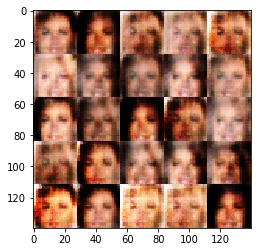

Epoch 1/1... Discriminator Loss: 1.0274... Generator Loss: 0.8826
Epoch 1/1... Discriminator Loss: 1.0478... Generator Loss: 0.8744
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 1.1420
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.5731
Epoch 1/1... Discriminator Loss: 1.0439... Generator Loss: 1.2205
Epoch 1/1... Discriminator Loss: 2.2271... Generator Loss: 0.2279
Epoch 1/1... Discriminator Loss: 1.4693... Generator Loss: 0.7664
Epoch 1/1... Discriminator Loss: 0.9086... Generator Loss: 1.1770
Epoch 1/1... Discriminator Loss: 1.0036... Generator Loss: 1.3217
Epoch 1/1... Discriminator Loss: 0.9864... Generator Loss: 1.5651


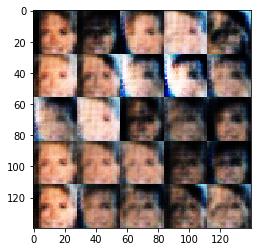

Epoch 1/1... Discriminator Loss: 1.0794... Generator Loss: 1.2077
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 0.8854... Generator Loss: 1.5849
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 1.0972
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 1.1083
Epoch 1/1... Discriminator Loss: 0.8241... Generator Loss: 1.8863
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 2.3892
Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 1.2421
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.5518
Epoch 1/1... Discriminator Loss: 1.0977... Generator Loss: 2.2164


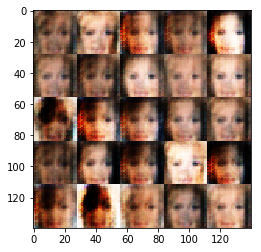

Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.6122
Epoch 1/1... Discriminator Loss: 1.1858... Generator Loss: 1.1118
Epoch 1/1... Discriminator Loss: 1.6362... Generator Loss: 0.4006
Epoch 1/1... Discriminator Loss: 1.7386... Generator Loss: 0.3585
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.6704
Epoch 1/1... Discriminator Loss: 0.9174... Generator Loss: 2.1477
Epoch 1/1... Discriminator Loss: 1.1467... Generator Loss: 2.6507
Epoch 1/1... Discriminator Loss: 1.2523... Generator Loss: 1.2028
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 1.7951
Epoch 1/1... Discriminator Loss: 1.2162... Generator Loss: 1.3152


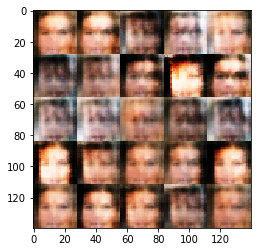

Epoch 1/1... Discriminator Loss: 0.9934... Generator Loss: 0.9292
Epoch 1/1... Discriminator Loss: 1.2917... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 1.1268
Epoch 1/1... Discriminator Loss: 0.9275... Generator Loss: 1.0267
Epoch 1/1... Discriminator Loss: 0.9787... Generator Loss: 1.5456
Epoch 1/1... Discriminator Loss: 0.8477... Generator Loss: 1.4673
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 1.1408
Epoch 1/1... Discriminator Loss: 0.9116... Generator Loss: 1.2299
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 1.0856... Generator Loss: 0.9554


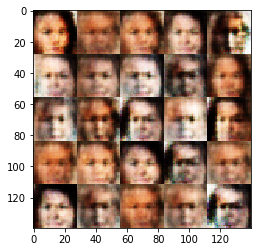

Epoch 1/1... Discriminator Loss: 0.8008... Generator Loss: 2.6804
Epoch 1/1... Discriminator Loss: 1.5796... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 1.0427
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.5285
Epoch 1/1... Discriminator Loss: 1.2231... Generator Loss: 2.2136
Epoch 1/1... Discriminator Loss: 0.6863... Generator Loss: 2.2747
Epoch 1/1... Discriminator Loss: 0.7821... Generator Loss: 1.7090
Epoch 1/1... Discriminator Loss: 1.0073... Generator Loss: 1.0954
Epoch 1/1... Discriminator Loss: 0.7713... Generator Loss: 1.9541
Epoch 1/1... Discriminator Loss: 1.0487... Generator Loss: 1.0693


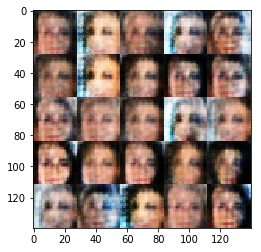

Epoch 1/1... Discriminator Loss: 0.8363... Generator Loss: 1.2781
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 0.9647
Epoch 1/1... Discriminator Loss: 1.0879... Generator Loss: 1.5766
Epoch 1/1... Discriminator Loss: 1.0254... Generator Loss: 1.2530
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.1214
Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 0.8978
Epoch 1/1... Discriminator Loss: 1.2142... Generator Loss: 2.6064
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.2399
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.9459
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 0.9968


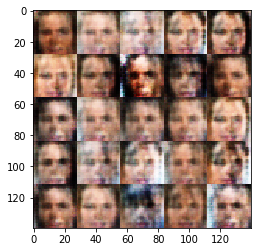

Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.2884
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.9340
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 1.1126
Epoch 1/1... Discriminator Loss: 0.9729... Generator Loss: 1.3736
Epoch 1/1... Discriminator Loss: 0.8327... Generator Loss: 1.6374
Epoch 1/1... Discriminator Loss: 0.6771... Generator Loss: 2.0626
Epoch 1/1... Discriminator Loss: 1.0471... Generator Loss: 0.8855
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 1.6142
Epoch 1/1... Discriminator Loss: 0.9989... Generator Loss: 1.1022
Epoch 1/1... Discriminator Loss: 0.9333... Generator Loss: 2.0444


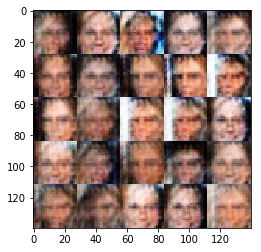

Epoch 1/1... Discriminator Loss: 0.9868... Generator Loss: 1.3186
Epoch 1/1... Discriminator Loss: 0.9601... Generator Loss: 1.1951
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 0.8380
Epoch 1/1... Discriminator Loss: 0.8902... Generator Loss: 1.6432
Epoch 1/1... Discriminator Loss: 0.9792... Generator Loss: 1.1705
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.5110
Epoch 1/1... Discriminator Loss: 0.8400... Generator Loss: 2.1911
Epoch 1/1... Discriminator Loss: 0.9117... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 0.8777... Generator Loss: 1.4938
Epoch 1/1... Discriminator Loss: 1.1596... Generator Loss: 2.8250


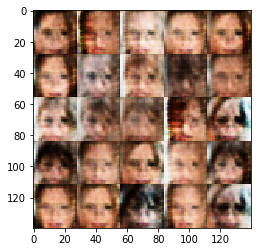

Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 1.6215
Epoch 1/1... Discriminator Loss: 1.4768... Generator Loss: 0.5827
Epoch 1/1... Discriminator Loss: 0.8310... Generator Loss: 1.5061
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 1.4838
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 0.7905
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.5811
Epoch 1/1... Discriminator Loss: 1.1892... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.1742... Generator Loss: 1.3269
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 1.0526
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.8062


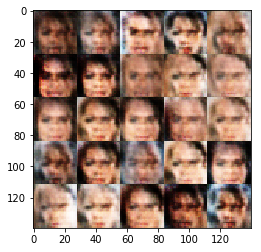

Epoch 1/1... Discriminator Loss: 1.0568... Generator Loss: 1.1834
Epoch 1/1... Discriminator Loss: 1.1626... Generator Loss: 1.9161
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 1.2453... Generator Loss: 1.5926
Epoch 1/1... Discriminator Loss: 1.6113... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 1.8104
Epoch 1/1... Discriminator Loss: 0.9658... Generator Loss: 1.4466
Epoch 1/1... Discriminator Loss: 1.0405... Generator Loss: 1.0991
Epoch 1/1... Discriminator Loss: 1.1680... Generator Loss: 2.2036
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 1.3358


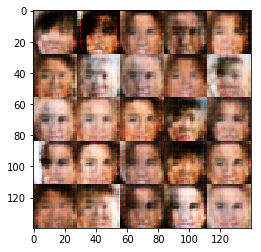

Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 1.4268
Epoch 1/1... Discriminator Loss: 1.1633... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 1.0461... Generator Loss: 1.0179
Epoch 1/1... Discriminator Loss: 0.9642... Generator Loss: 1.3870
Epoch 1/1... Discriminator Loss: 0.9954... Generator Loss: 1.5582
Epoch 1/1... Discriminator Loss: 1.6154... Generator Loss: 1.0217
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.9984
Epoch 1/1... Discriminator Loss: 1.0859... Generator Loss: 1.2550
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 1.0259
Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 1.0275


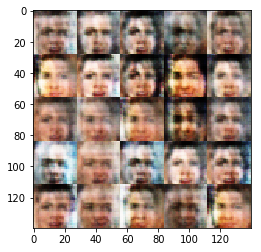

Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.7948
Epoch 1/1... Discriminator Loss: 1.0088... Generator Loss: 1.1308
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.5445
Epoch 1/1... Discriminator Loss: 0.9815... Generator Loss: 1.1696
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 0.9483
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 1.1796
Epoch 1/1... Discriminator Loss: 0.9610... Generator Loss: 1.2207
Epoch 1/1... Discriminator Loss: 0.7692... Generator Loss: 2.1132
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 1.0668
Epoch 1/1... Discriminator Loss: 1.0549... Generator Loss: 1.3589


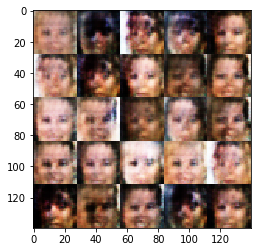

Epoch 1/1... Discriminator Loss: 0.9622... Generator Loss: 1.3477
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.3693
Epoch 1/1... Discriminator Loss: 0.9603... Generator Loss: 1.6447
Epoch 1/1... Discriminator Loss: 1.2490... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.8667
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.5741
Epoch 1/1... Discriminator Loss: 0.7407... Generator Loss: 1.6167
Epoch 1/1... Discriminator Loss: 1.2906... Generator Loss: 1.8121
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.8127
Epoch 1/1... Discriminator Loss: 1.0768... Generator Loss: 1.4475


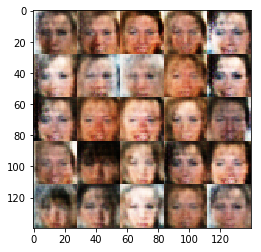

Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 1.1185
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 0.8138
Epoch 1/1... Discriminator Loss: 1.1511... Generator Loss: 1.0559
Epoch 1/1... Discriminator Loss: 1.1426... Generator Loss: 0.9610
Epoch 1/1... Discriminator Loss: 1.4550... Generator Loss: 0.4820
Epoch 1/1... Discriminator Loss: 1.0375... Generator Loss: 1.8945
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 1.4118
Epoch 1/1... Discriminator Loss: 0.9997... Generator Loss: 1.2060
Epoch 1/1... Discriminator Loss: 0.9497... Generator Loss: 1.3777
Epoch 1/1... Discriminator Loss: 1.0293... Generator Loss: 1.0573


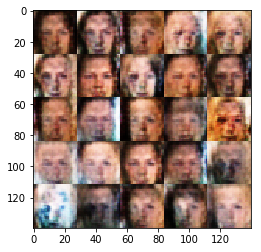

Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.5602
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.9302
Epoch 1/1... Discriminator Loss: 1.0021... Generator Loss: 1.3854
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 1.2470
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.5067
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 0.9437
Epoch 1/1... Discriminator Loss: 1.1897... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.0458... Generator Loss: 1.2061
Epoch 1/1... Discriminator Loss: 0.9380... Generator Loss: 2.0400


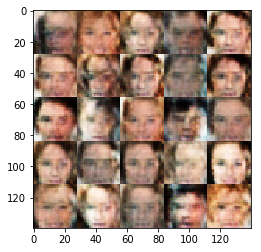

Epoch 1/1... Discriminator Loss: 1.1089... Generator Loss: 1.3313
Epoch 1/1... Discriminator Loss: 1.0731... Generator Loss: 1.5178
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 1.4549
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 1.2867
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 0.8027... Generator Loss: 1.4723
Epoch 1/1... Discriminator Loss: 1.0318... Generator Loss: 1.3479
Epoch 1/1... Discriminator Loss: 1.2530... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.4641
Epoch 1/1... Discriminator Loss: 0.9547... Generator Loss: 1.2304


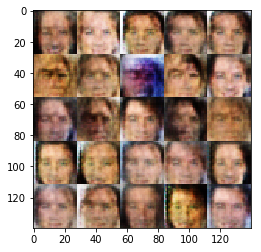

Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 1.2161
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.7676
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.3610
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 1.6894
Epoch 1/1... Discriminator Loss: 0.9267... Generator Loss: 1.1701
Epoch 1/1... Discriminator Loss: 1.0875... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.2976
Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 1.5219
Epoch 1/1... Discriminator Loss: 1.0956... Generator Loss: 0.9011
Epoch 1/1... Discriminator Loss: 0.9673... Generator Loss: 1.1529


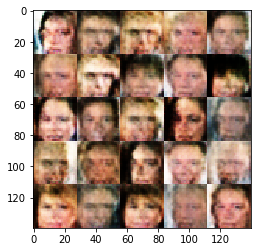

Epoch 1/1... Discriminator Loss: 0.8804... Generator Loss: 1.6132
Epoch 1/1... Discriminator Loss: 1.3164... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 0.9255... Generator Loss: 1.1361
Epoch 1/1... Discriminator Loss: 0.9671... Generator Loss: 0.9980
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 1.2492
Epoch 1/1... Discriminator Loss: 1.0439... Generator Loss: 1.3230
Epoch 1/1... Discriminator Loss: 1.1402... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 1.3255... Generator Loss: 0.7231
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.3761
Epoch 1/1... Discriminator Loss: 1.0836... Generator Loss: 0.9063


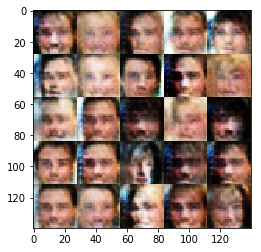

Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 2.1260
Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 1.7229
Epoch 1/1... Discriminator Loss: 0.9389... Generator Loss: 1.2246
Epoch 1/1... Discriminator Loss: 1.5468... Generator Loss: 0.4441
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 0.8899
Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 1.0877
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 0.6113
Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.9371
Epoch 1/1... Discriminator Loss: 1.0079... Generator Loss: 0.9560
Epoch 1/1... Discriminator Loss: 0.9568... Generator Loss: 1.2480


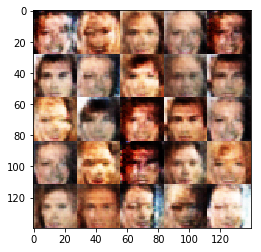

Epoch 1/1... Discriminator Loss: 0.8251... Generator Loss: 1.5553
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.2028
Epoch 1/1... Discriminator Loss: 1.1977... Generator Loss: 0.9018
Epoch 1/1... Discriminator Loss: 1.7252... Generator Loss: 0.3872
Epoch 1/1... Discriminator Loss: 1.5116... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 1.2286... Generator Loss: 0.7482
Epoch 1/1... Discriminator Loss: 0.9145... Generator Loss: 1.3515
Epoch 1/1... Discriminator Loss: 1.0289... Generator Loss: 1.2447
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 1.5232


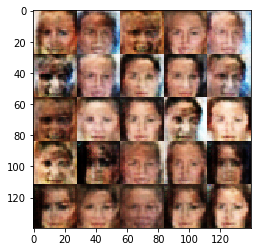

Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.9224
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 1.0745
Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 1.5178
Epoch 1/1... Discriminator Loss: 0.8881... Generator Loss: 1.4328
Epoch 1/1... Discriminator Loss: 1.1786... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 0.7904... Generator Loss: 2.0552
Epoch 1/1... Discriminator Loss: 1.0511... Generator Loss: 1.2463
Epoch 1/1... Discriminator Loss: 1.0560... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.2541... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 0.8158... Generator Loss: 1.4961


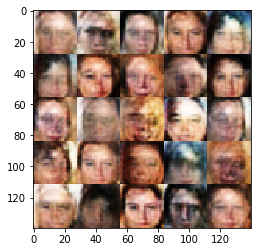

Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 1.1646
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 1.1502
Epoch 1/1... Discriminator Loss: 1.1977... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 1.0580... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 0.9268... Generator Loss: 1.4150
Epoch 1/1... Discriminator Loss: 0.8966... Generator Loss: 1.3009
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 0.9779
Epoch 1/1... Discriminator Loss: 0.9235... Generator Loss: 1.4542
Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 0.9232
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.7608


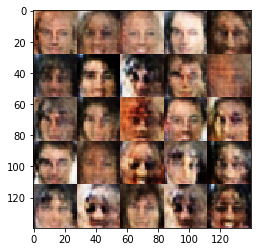

Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 1.1893
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 1.0890
Epoch 1/1... Discriminator Loss: 1.1305... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.8631
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 1.1873
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.6552
Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 1.3615
Epoch 1/1... Discriminator Loss: 1.0266... Generator Loss: 0.9439
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 0.8785


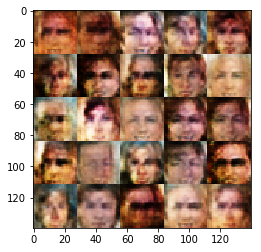

Epoch 1/1... Discriminator Loss: 0.9450... Generator Loss: 1.1473
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 0.9540
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.9548
Epoch 1/1... Discriminator Loss: 0.8010... Generator Loss: 1.5999
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 0.8634... Generator Loss: 1.2979
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.6460
Epoch 1/1... Discriminator Loss: 0.9160... Generator Loss: 1.7951
Epoch 1/1... Discriminator Loss: 0.7971... Generator Loss: 1.3802
Epoch 1/1... Discriminator Loss: 0.9734... Generator Loss: 1.0164


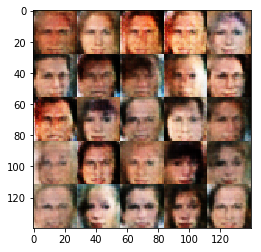

Epoch 1/1... Discriminator Loss: 1.0620... Generator Loss: 0.9403
Epoch 1/1... Discriminator Loss: 1.2496... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 0.9761... Generator Loss: 1.0390
Epoch 1/1... Discriminator Loss: 1.1345... Generator Loss: 1.6591
Epoch 1/1... Discriminator Loss: 0.6199... Generator Loss: 1.7237
Epoch 1/1... Discriminator Loss: 1.0986... Generator Loss: 0.8783
Epoch 1/1... Discriminator Loss: 0.7141... Generator Loss: 2.1030
Epoch 1/1... Discriminator Loss: 1.5925... Generator Loss: 2.8528
Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 1.0195
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.5431


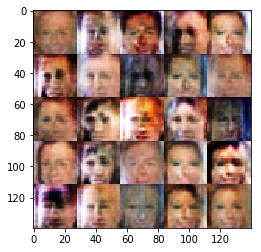

Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 1.3376
Epoch 1/1... Discriminator Loss: 0.7024... Generator Loss: 1.6444
Epoch 1/1... Discriminator Loss: 0.6577... Generator Loss: 1.6636
Epoch 1/1... Discriminator Loss: 1.7996... Generator Loss: 0.3396
Epoch 1/1... Discriminator Loss: 1.0049... Generator Loss: 0.9784
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 0.8121... Generator Loss: 1.8363
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.0697
Epoch 1/1... Discriminator Loss: 0.9945... Generator Loss: 1.8364


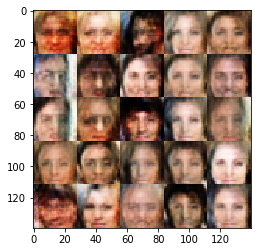

Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 1.1514
Epoch 1/1... Discriminator Loss: 0.7899... Generator Loss: 1.6556
Epoch 1/1... Discriminator Loss: 0.9790... Generator Loss: 1.2303
Epoch 1/1... Discriminator Loss: 1.0807... Generator Loss: 0.8921
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 1.3612
Epoch 1/1... Discriminator Loss: 0.9508... Generator Loss: 1.3860
Epoch 1/1... Discriminator Loss: 0.8236... Generator Loss: 2.0093
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 1.5394
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.7198
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 1.3318


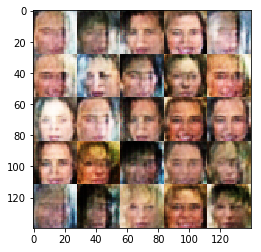

Epoch 1/1... Discriminator Loss: 1.3504... Generator Loss: 0.8659
Epoch 1/1... Discriminator Loss: 1.2680... Generator Loss: 1.0927
Epoch 1/1... Discriminator Loss: 1.1099... Generator Loss: 0.7975
Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.1822... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 0.9150... Generator Loss: 1.4805
Epoch 1/1... Discriminator Loss: 1.1037... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 0.8790
Epoch 1/1... Discriminator Loss: 1.1711... Generator Loss: 1.0268


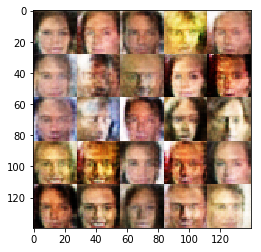

Epoch 1/1... Discriminator Loss: 1.1047... Generator Loss: 1.2159
Epoch 1/1... Discriminator Loss: 0.9183... Generator Loss: 1.3931
Epoch 1/1... Discriminator Loss: 0.9559... Generator Loss: 1.4860
Epoch 1/1... Discriminator Loss: 1.0652... Generator Loss: 1.0069
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 0.9274... Generator Loss: 1.3936
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 0.8606
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 1.0857
Epoch 1/1... Discriminator Loss: 0.9690... Generator Loss: 1.0401
Epoch 1/1... Discriminator Loss: 1.0099... Generator Loss: 1.1997


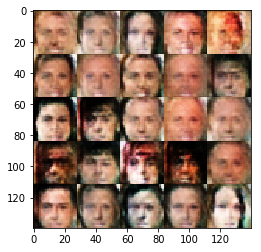

Epoch 1/1... Discriminator Loss: 1.0248... Generator Loss: 1.2495
Epoch 1/1... Discriminator Loss: 0.9185... Generator Loss: 1.2989
Epoch 1/1... Discriminator Loss: 1.4312... Generator Loss: 0.5204
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 1.1789
Epoch 1/1... Discriminator Loss: 0.8627... Generator Loss: 2.8439
Epoch 1/1... Discriminator Loss: 0.8448... Generator Loss: 1.3118
Epoch 1/1... Discriminator Loss: 0.9725... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 1.1395... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 0.8209
Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 1.0688


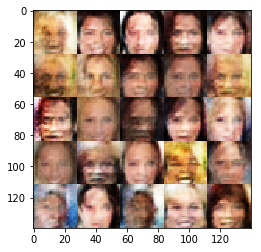

Epoch 1/1... Discriminator Loss: 1.0340... Generator Loss: 1.3055
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 1.1685
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 0.7833
Epoch 1/1... Discriminator Loss: 1.3031... Generator Loss: 0.9743
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 1.0952
Epoch 1/1... Discriminator Loss: 0.8308... Generator Loss: 1.4362
Epoch 1/1... Discriminator Loss: 1.0684... Generator Loss: 1.0272
Epoch 1/1... Discriminator Loss: 0.9424... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 0.9326... Generator Loss: 1.5025
Epoch 1/1... Discriminator Loss: 1.0659... Generator Loss: 0.8900


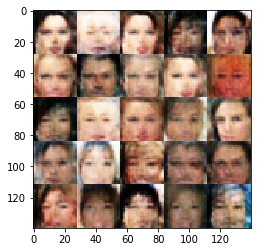

Epoch 1/1... Discriminator Loss: 1.0154... Generator Loss: 1.0982
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.8163
Epoch 1/1... Discriminator Loss: 1.1259... Generator Loss: 1.0202
Epoch 1/1... Discriminator Loss: 1.0845... Generator Loss: 1.0776
Epoch 1/1... Discriminator Loss: 0.7017... Generator Loss: 1.8444
Epoch 1/1... Discriminator Loss: 1.0550... Generator Loss: 1.0217
Epoch 1/1... Discriminator Loss: 1.0876... Generator Loss: 0.9881
Epoch 1/1... Discriminator Loss: 1.2534... Generator Loss: 0.6632
Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 0.7035
Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 0.8659


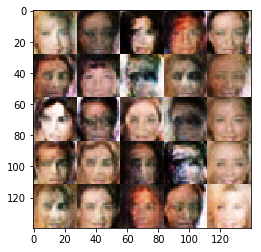

Epoch 1/1... Discriminator Loss: 1.1790... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 0.7451
Epoch 1/1... Discriminator Loss: 1.0232... Generator Loss: 1.3222
Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 1.3893
Epoch 1/1... Discriminator Loss: 1.0234... Generator Loss: 1.1169
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 0.9144
Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 1.2204
Epoch 1/1... Discriminator Loss: 0.8006... Generator Loss: 1.4930
Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 1.1532
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 0.6822


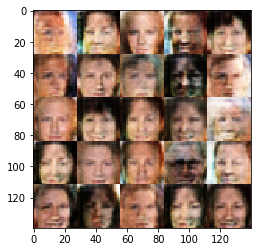

Epoch 1/1... Discriminator Loss: 0.8732... Generator Loss: 1.6351
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 0.8376
Epoch 1/1... Discriminator Loss: 0.8233... Generator Loss: 1.5984
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 1.2460
Epoch 1/1... Discriminator Loss: 0.8306... Generator Loss: 1.7662
Epoch 1/1... Discriminator Loss: 1.0068... Generator Loss: 0.9875
Epoch 1/1... Discriminator Loss: 1.5561... Generator Loss: 0.3964
Epoch 1/1... Discriminator Loss: 0.6949... Generator Loss: 2.0831
Epoch 1/1... Discriminator Loss: 1.0235... Generator Loss: 1.1979
Epoch 1/1... Discriminator Loss: 0.9488... Generator Loss: 1.4005


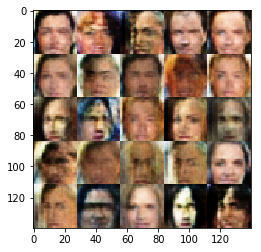

Epoch 1/1... Discriminator Loss: 1.0211... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 0.9469... Generator Loss: 1.3348
Epoch 1/1... Discriminator Loss: 0.8844... Generator Loss: 1.5710
Epoch 1/1... Discriminator Loss: 0.9638... Generator Loss: 1.1453
Epoch 1/1... Discriminator Loss: 1.0770... Generator Loss: 0.8748
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 1.6357
Epoch 1/1... Discriminator Loss: 0.9088... Generator Loss: 1.3908
Epoch 1/1... Discriminator Loss: 0.9745... Generator Loss: 0.9346
Epoch 1/1... Discriminator Loss: 1.0223... Generator Loss: 1.0976
Epoch 1/1... Discriminator Loss: 0.8726... Generator Loss: 1.4087


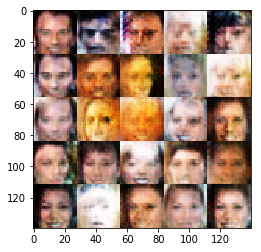

Epoch 1/1... Discriminator Loss: 0.8239... Generator Loss: 1.3174
Epoch 1/1... Discriminator Loss: 0.8005... Generator Loss: 1.5001
Epoch 1/1... Discriminator Loss: 1.0850... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 0.7474... Generator Loss: 1.4089
Epoch 1/1... Discriminator Loss: 1.0954... Generator Loss: 1.0929
Epoch 1/1... Discriminator Loss: 0.7729... Generator Loss: 1.5775
Epoch 1/1... Discriminator Loss: 1.1823... Generator Loss: 0.6815
Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 2.0634
Epoch 1/1... Discriminator Loss: 1.1643... Generator Loss: 0.7329
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.5980


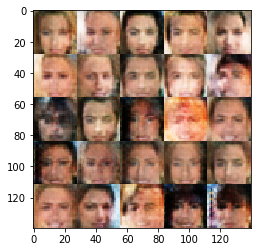

Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 1.0304
Epoch 1/1... Discriminator Loss: 1.0490... Generator Loss: 1.2800
Epoch 1/1... Discriminator Loss: 1.0635... Generator Loss: 0.9806
Epoch 1/1... Discriminator Loss: 1.1125... Generator Loss: 0.8504
Epoch 1/1... Discriminator Loss: 1.1280... Generator Loss: 1.2923
Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.1402... Generator Loss: 0.8746
Epoch 1/1... Discriminator Loss: 0.8850... Generator Loss: 1.2651
Epoch 1/1... Discriminator Loss: 0.8868... Generator Loss: 1.3114


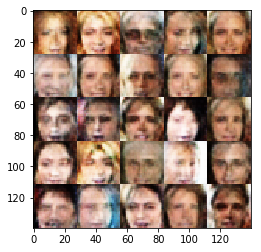

Epoch 1/1... Discriminator Loss: 1.1221... Generator Loss: 0.8882
Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 1.1375
Epoch 1/1... Discriminator Loss: 0.8534... Generator Loss: 1.4928
Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 1.1056
Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 1.5731
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 0.8191... Generator Loss: 1.5038
Epoch 1/1... Discriminator Loss: 1.1315... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 0.9861


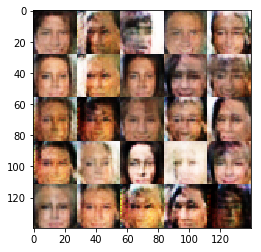

Epoch 1/1... Discriminator Loss: 0.8468... Generator Loss: 1.3669
Epoch 1/1... Discriminator Loss: 1.0356... Generator Loss: 1.6857
Epoch 1/1... Discriminator Loss: 1.1421... Generator Loss: 0.7964
Epoch 1/1... Discriminator Loss: 1.1346... Generator Loss: 1.8444
Epoch 1/1... Discriminator Loss: 0.9240... Generator Loss: 1.0423
Epoch 1/1... Discriminator Loss: 0.9376... Generator Loss: 1.1787
Epoch 1/1... Discriminator Loss: 0.6829... Generator Loss: 1.8715
Epoch 1/1... Discriminator Loss: 0.8442... Generator Loss: 1.4382
Epoch 1/1... Discriminator Loss: 0.9268... Generator Loss: 1.5722
Epoch 1/1... Discriminator Loss: 0.8207... Generator Loss: 1.5718


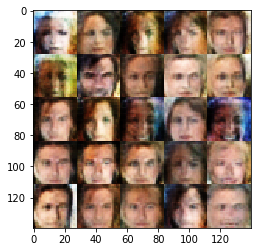

Epoch 1/1... Discriminator Loss: 1.0819... Generator Loss: 1.1447
Epoch 1/1... Discriminator Loss: 0.9804... Generator Loss: 0.9613
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 0.7412
Epoch 1/1... Discriminator Loss: 1.5140... Generator Loss: 2.3871
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.9759
Epoch 1/1... Discriminator Loss: 0.8671... Generator Loss: 1.5931
Epoch 1/1... Discriminator Loss: 1.1337... Generator Loss: 1.4738
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 2.2418
Epoch 1/1... Discriminator Loss: 1.0333... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.0282... Generator Loss: 1.4876


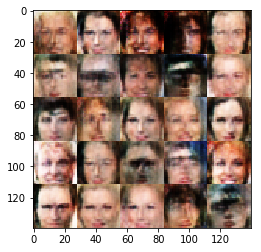

Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 2.0129
Epoch 1/1... Discriminator Loss: 0.9602... Generator Loss: 1.1539
Epoch 1/1... Discriminator Loss: 1.1162... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 1.4013
Epoch 1/1... Discriminator Loss: 1.2430... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 1.6965
Epoch 1/1... Discriminator Loss: 0.8617... Generator Loss: 1.5964
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.1092
Epoch 1/1... Discriminator Loss: 0.8657... Generator Loss: 1.4904
Epoch 1/1... Discriminator Loss: 1.0545... Generator Loss: 1.0016


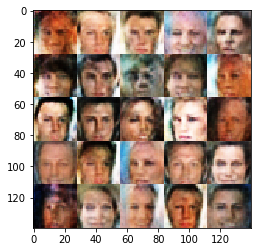

Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 1.1169
Epoch 1/1... Discriminator Loss: 0.8846... Generator Loss: 1.2449
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 0.9838... Generator Loss: 0.9886
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.8967
Epoch 1/1... Discriminator Loss: 1.0717... Generator Loss: 1.1688
Epoch 1/1... Discriminator Loss: 1.0098... Generator Loss: 1.2087
Epoch 1/1... Discriminator Loss: 1.0500... Generator Loss: 1.0515
Epoch 1/1... Discriminator Loss: 1.2320... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 0.8620... Generator Loss: 1.8928


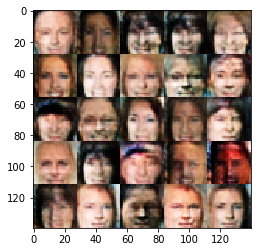

Epoch 1/1... Discriminator Loss: 1.1117... Generator Loss: 1.4227
Epoch 1/1... Discriminator Loss: 1.0752... Generator Loss: 1.0242
Epoch 1/1... Discriminator Loss: 0.8671... Generator Loss: 1.6908
Epoch 1/1... Discriminator Loss: 1.1712... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 0.7967... Generator Loss: 1.4603
Epoch 1/1... Discriminator Loss: 0.9486... Generator Loss: 1.2825
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 1.4804
Epoch 1/1... Discriminator Loss: 1.0520... Generator Loss: 1.0312
Epoch 1/1... Discriminator Loss: 1.0806... Generator Loss: 1.2556
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 0.9857


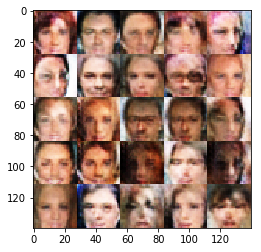

Epoch 1/1... Discriminator Loss: 1.0006... Generator Loss: 0.9048
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 0.9375
Epoch 1/1... Discriminator Loss: 0.8953... Generator Loss: 1.4187
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 0.9659
Epoch 1/1... Discriminator Loss: 1.1312... Generator Loss: 0.8727
Epoch 1/1... Discriminator Loss: 0.8381... Generator Loss: 1.5689
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 0.9306
Epoch 1/1... Discriminator Loss: 1.1494... Generator Loss: 1.0584
Epoch 1/1... Discriminator Loss: 1.0400... Generator Loss: 1.2631
Epoch 1/1... Discriminator Loss: 0.8804... Generator Loss: 1.4255


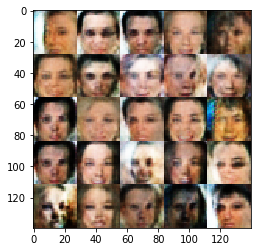

Epoch 1/1... Discriminator Loss: 0.7571... Generator Loss: 1.7136
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.0782... Generator Loss: 0.9993
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 1.1062
Epoch 1/1... Discriminator Loss: 1.0991... Generator Loss: 1.0904
Epoch 1/1... Discriminator Loss: 1.0556... Generator Loss: 1.2139
Epoch 1/1... Discriminator Loss: 1.2350... Generator Loss: 1.2295
Epoch 1/1... Discriminator Loss: 0.8262... Generator Loss: 1.3393
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 0.8759
Epoch 1/1... Discriminator Loss: 0.9122... Generator Loss: 1.2346


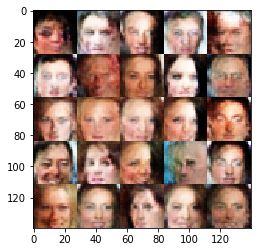

Epoch 1/1... Discriminator Loss: 1.1386... Generator Loss: 1.0143
Epoch 1/1... Discriminator Loss: 0.8946... Generator Loss: 1.6793
Epoch 1/1... Discriminator Loss: 1.2205... Generator Loss: 1.3093
Epoch 1/1... Discriminator Loss: 0.7272... Generator Loss: 1.7166
Epoch 1/1... Discriminator Loss: 1.2303... Generator Loss: 0.7848
Epoch 1/1... Discriminator Loss: 1.1269... Generator Loss: 1.0153
Epoch 1/1... Discriminator Loss: 0.7250... Generator Loss: 1.8136
Epoch 1/1... Discriminator Loss: 0.9880... Generator Loss: 1.1071
Epoch 1/1... Discriminator Loss: 0.8718... Generator Loss: 1.9804
Epoch 1/1... Discriminator Loss: 1.0271... Generator Loss: 1.0202


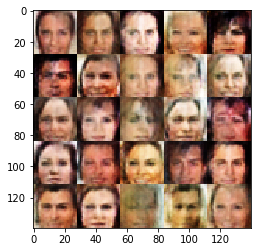

Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 0.9742
Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.0532... Generator Loss: 1.5504
Epoch 1/1... Discriminator Loss: 1.0699... Generator Loss: 0.9475
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 0.7317... Generator Loss: 1.6108
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 2.8887
Epoch 1/1... Discriminator Loss: 1.1591... Generator Loss: 1.2715
Epoch 1/1... Discriminator Loss: 1.2285... Generator Loss: 0.6906


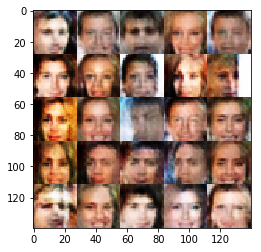

Epoch 1/1... Discriminator Loss: 0.7566... Generator Loss: 1.7434
Epoch 1/1... Discriminator Loss: 1.2318... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 0.7807... Generator Loss: 1.4398
Epoch 1/1... Discriminator Loss: 0.9758... Generator Loss: 1.6304
Epoch 1/1... Discriminator Loss: 1.0469... Generator Loss: 1.2750
Epoch 1/1... Discriminator Loss: 1.0207... Generator Loss: 1.3380
Epoch 1/1... Discriminator Loss: 1.0311... Generator Loss: 0.9356
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 1.5981
Epoch 1/1... Discriminator Loss: 0.9807... Generator Loss: 1.0851
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.9207


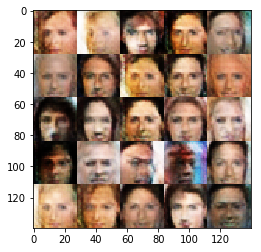

Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.5499
Epoch 1/1... Discriminator Loss: 1.0381... Generator Loss: 0.8802
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 0.6440
Epoch 1/1... Discriminator Loss: 1.0523... Generator Loss: 1.2048
Epoch 1/1... Discriminator Loss: 0.9171... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 0.9655
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 0.5935
Epoch 1/1... Discriminator Loss: 0.9884... Generator Loss: 0.9932
Epoch 1/1... Discriminator Loss: 0.9140... Generator Loss: 1.0133
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 1.2842


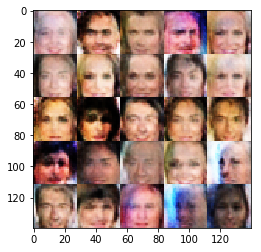

Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 1.0086
Epoch 1/1... Discriminator Loss: 1.4651... Generator Loss: 0.5766
Epoch 1/1... Discriminator Loss: 1.0512... Generator Loss: 1.1131
Epoch 1/1... Discriminator Loss: 0.8652... Generator Loss: 1.7187
Epoch 1/1... Discriminator Loss: 0.6181... Generator Loss: 2.4706
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 0.9768
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.7389
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.6921
Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 1.4929


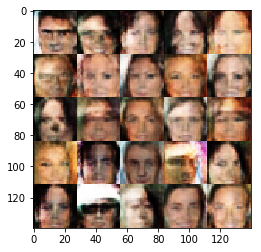

Epoch 1/1... Discriminator Loss: 1.0661... Generator Loss: 1.3546
Epoch 1/1... Discriminator Loss: 0.9858... Generator Loss: 1.3044
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 1.1479


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.